In [ ]:
import torch
import matplotlib.pyplot as plt

step: 0, loss = 12.5592
step: 10, loss = 0.3860
step: 20, loss = 0.2261
step: 30, loss = 0.2238
step: 40, loss = 0.2238
step: 50, loss = 0.2238
step: 60, loss = 0.2238
step: 70, loss = 0.2238
step: 80, loss = 0.2238
step: 90, loss = 0.2238


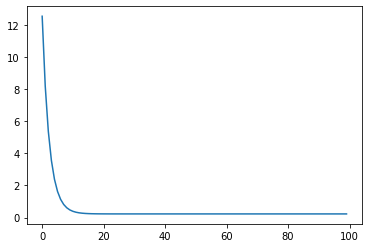

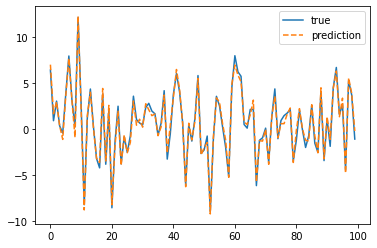

w_true:  tensor([1., 2., 3.])
w [0.9674181 1.9624916 2.9726555]


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

w_true = torch.Tensor([1, 2, 3]) # 참의 계수
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1) # 입력 Data
Y = torch.mv(X, w_true) + torch.randn(100) * 0.5 # target
Y = Y.view(-1,1)
net = torch.nn.Linear(in_features=3,out_features=1,bias=False)
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
losses = [] # 손실 함수의 로그

net.to(device)
X = X.to(device)
Y = Y.to(device)

for epoch in range(100): # 100회 반복
    optimizer.zero_grad()
    y_pred = net(X) # 선형 모델로 y 예측 값을 계산
    # MSE loss와 w에 의한 미분을 계산
    loss = torch.mean((Y - y_pred)**2)
    loss.backward()
    optimizer.step()
    losses.append(loss.item()) # 수렴 확인을 위한 loss를 기록해둔다
    if epoch%10==0:
        print('step: {}, loss = {:.4f}'.format(epoch,loss.item()))
plt.plot(losses)
plt.show()
plt.plot(Y.cpu().numpy().reshape(-1),label='true')
plt.plot(y_pred.cpu().detach().numpy().reshape(-1),label='prediction',linestyle='--')
plt.legend()
plt.show()
print('w_true: ', w_true)
print('w', net.weight[0].cpu().detach().numpy())

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
torch.device('cuda:0')

device(type='cuda')

In [ ]:
import pandas as pd

In [ ]:
url = "https://github.com/hccho2/hccho2FirstGitProject/raw/master/iris2.csv"
data = pd.read_csv(url,skiprows = 1,header=None,names=['feature1','feature2','feature3','feature4','label'])




In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head(5)

,feature1,feature2,feature3,feature4,label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  150 non-null    float64
 1   feature2  150 non-null    float64
 2   feature3  150 non-null    float64
 3   feature4  150 non-null    float64
 4   label     150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe()

,feature1,feature2,feature3,feature4,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [ ]:
data.values

In [ ]:
data_map = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
data['label'] = data['label'].map(data_map)

In [ ]:
data.head(5)

,feature1,feature2,feature3,feature4,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data['label'].map(data_map)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: label, Length: 150, dtype: float64

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris['filename']

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [ ]:
data = pd.DataFrame(    np.c_[ iris['data'], iris['target'] ] , columns = iris['feature_names'] + ['target' ]         )

In [ ]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

{'boxes': [<matplotlib.lines.Line2D at 0x7f59747bf9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f59747ce438>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f59747d9240>,
 'means': [<matplotlib.lines.Line2D at 0x7f59747ceeb8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f59747ceb38>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f59747bfcf8>,
  <matplotlib.lines.Line2D at 0x7f5974799278>]}

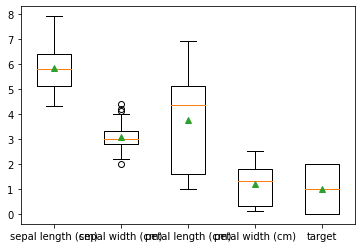

In [ ]:
plt.boxplot(data.values,labels=data.columns,showmeans=True)

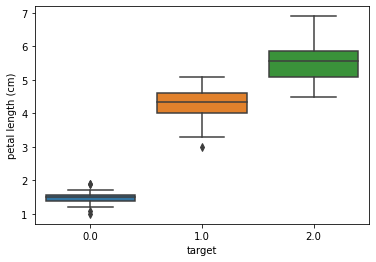

In [ ]:
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)	target
sns.boxplot(x='target',y='petal length (cm)',  data=data)

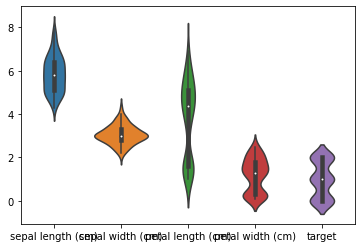

In [ ]:
sns.violinplot(data=data)

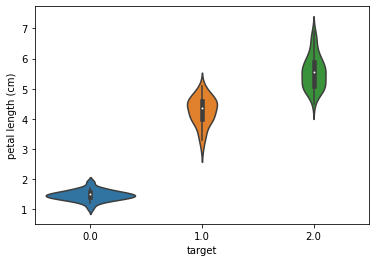

In [ ]:
sns.violinplot(x='target',y='petal length (cm)',data=data)

In [ ]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn.functional as F

In [ ]:
model = nn.Sequential(   nn.Linear(4,10), nn.ReLU(), nn.Linear(10,10), nn.ReLU(), nn.Linear(10,3)   )

In [ ]:
for p in model.parameters():
    print(p.shape)

torch.Size([10, 4])
torch.Size([10])
torch.Size([10, 10])
torch.Size([10])
torch.Size([3, 10])
torch.Size([3])


In [ ]:
data_x = data.values[:, :4]
X = torch.tensor(data_x, dtype=torch.float32)
Y = torch.tensor(data.values[:,-1],dtype = torch.long)


In [ ]:
X.shape, Y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [ ]:
ds = TensorDataset(X,Y)
loader = DataLoader(ds, batch_size = 32, shuffle=True,drop_last=True)

In [ ]:
# loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001   )

In [ ]:
n_epoch = 200
history_loss = []
history_acc = []

for i in range(n_epoch):
    acc  = 0
    n = 0
    running_loss = []
    for x,y in loader:
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred,y)
        
        loss.backward()

        optimizer.step()
        _,pred = pred.max(axis=-1)
        acc  += (pred==y).float().sum().item()
        n += len(y)

        # running loss
        running_loss.append(loss.item())

    history_acc.append(acc/n)
    history_loss.append(np.mean(running_loss))   # epoch 평균

    if i % 10 ==0:
        print(f'{i}/{n_epoch}, loss = {loss.item():.4f}, acc = {history_acc[-1]:.3f}')




0/200, loss = 1.1509, acc = 0.352
10/200, loss = 1.1234, acc = 0.352
20/200, loss = 1.1025, acc = 0.344
30/200, loss = 1.0759, acc = 0.328
40/200, loss = 1.0097, acc = 0.344
50/200, loss = 0.9064, acc = 0.672
60/200, loss = 0.8451, acc = 0.680
70/200, loss = 0.7531, acc = 0.797
80/200, loss = 0.6962, acc = 0.664
90/200, loss = 0.6352, acc = 0.633
100/200, loss = 0.6050, acc = 0.945
110/200, loss = 0.5529, acc = 0.945
120/200, loss = 0.3888, acc = 0.977
130/200, loss = 0.3312, acc = 0.969
140/200, loss = 0.2825, acc = 0.969
150/200, loss = 0.2294, acc = 0.984
160/200, loss = 0.1859, acc = 0.984
170/200, loss = 0.1525, acc = 0.977
180/200, loss = 0.1475, acc = 0.977
190/200, loss = 0.1155, acc = 0.984


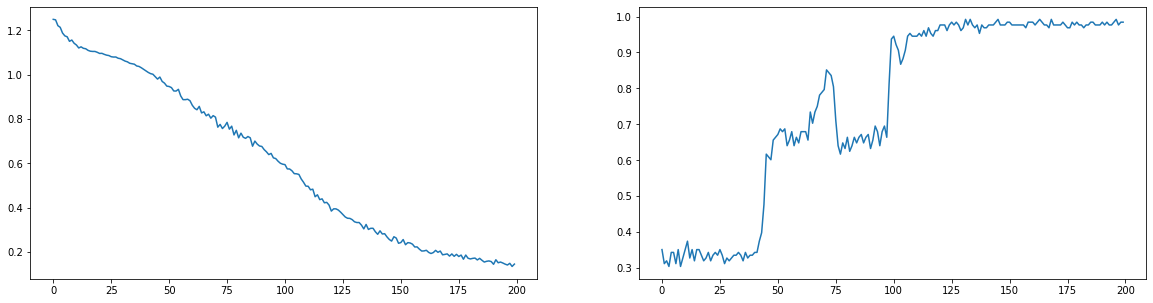

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_loss,label='loss')
plt.subplot(1,2,2)
plt.plot(history_acc,label='acc')

In [ ]:
for x,y in loader:
    pred = model(x)
    _, pred = pred.max(axis=-1)
    print((pred==y).float().sum())
    break

tensor(31.)


# Logistic Regression

In [ ]:
import numpy as np
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = 'https://github.com/hccho2/hccho2FirstGitProject/raw/master/mydata2.txt'
mydata = np.genfromtxt(url,delimiter=',',dtype=np.float32)
A=mydata[:, 0:2]
B=mydata[:, 2:3]

In [ ]:
A.shape, B.shape

((118, 2), (118, 1))

In [ ]:
X = torch.tensor(A,dtype=torch.float32)
Y = torch.tensor(B,dtype=torch.float32)
ds = TensorDataset(X,Y)
loader = DataLoader(ds,batch_size=32,shuffle=True)

In [ ]:
model = nn.Sequential(nn.Linear(2,10),nn.ReLU(),nn.Linear(10,1),nn.Sigmoid())

In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
n_epoch = 1000

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)
history_loss = []
history_acc  = []
for epoch in range(n_epoch):
    model.train()
    running_loss = []
    acc = 0
    n = 0
    for i,(x,y) in enumerate(loader):
        optimizer.zero_grad()
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        loss = loss_fn(pred,y)
        loss.backward()
        optimizer.step()
        running_loss.append(loss.item())
        pred = (pred > 0.5).long()
        acc += (pred==y).float().sum().item()
        n += len(y)
    
    history_loss.append(np.mean(running_loss))
    history_acc.append(acc/n)
    if epoch%50==0:
        print('epoch: {}/{}, loss: {:.4f}, acc: {:.4f}'.format(epoch+1,n_epoch,history_loss[-1],history_acc[-1]))

cpu
epoch: 1/1000, loss: 0.3056, acc: 0.8729
epoch: 51/1000, loss: 0.2917, acc: 0.8729
epoch: 101/1000, loss: 0.3012, acc: 0.8644
epoch: 151/1000, loss: 0.3117, acc: 0.8644
epoch: 201/1000, loss: 0.3051, acc: 0.8814
epoch: 251/1000, loss: 0.2914, acc: 0.8729
epoch: 301/1000, loss: 0.2936, acc: 0.8729
epoch: 351/1000, loss: 0.3133, acc: 0.8729
epoch: 401/1000, loss: 0.3052, acc: 0.8729
epoch: 451/1000, loss: 0.2964, acc: 0.8729
epoch: 501/1000, loss: 0.2983, acc: 0.8729
epoch: 551/1000, loss: 0.2916, acc: 0.8559
epoch: 601/1000, loss: 0.2941, acc: 0.8729
epoch: 651/1000, loss: 0.2988, acc: 0.8729
epoch: 701/1000, loss: 0.3101, acc: 0.8729
epoch: 751/1000, loss: 0.3076, acc: 0.8729
epoch: 801/1000, loss: 0.2858, acc: 0.8729
epoch: 851/1000, loss: 0.3040, acc: 0.8729
epoch: 901/1000, loss: 0.3070, acc: 0.8729
epoch: 951/1000, loss: 0.3139, acc: 0.8729


In [ ]:
df=pd.DataFrame(data=mydata,columns=['x','y','target'])

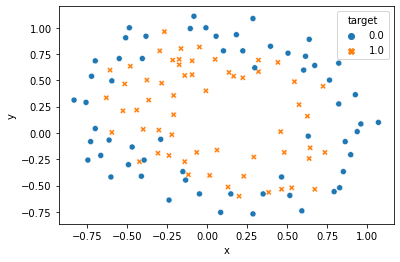

In [ ]:
sns.scatterplot(x='x',y='y',hue='target',style='target',data=df)

In [ ]:
prediction = (model(X) > 0.5).int().numpy()

In [ ]:
df2=pd.DataFrame(data=np.c_[mydata, prediction],columns=['x','y','label','prediction'])
df2['misprediction']=   df2['label'] != df2['prediction']

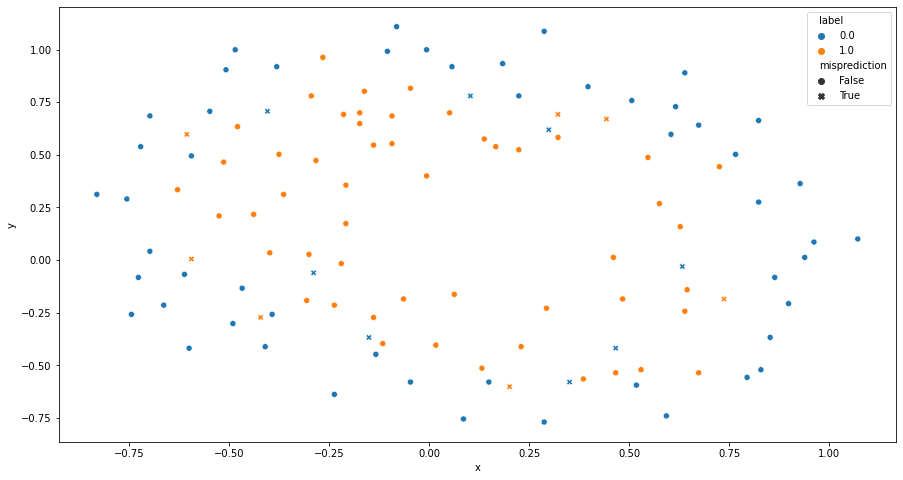

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='x',y='y',hue='label',style='misprediction',data=df2)

In [ ]:
f = nn.Sigmoid()
logits = torch.tensor([-2.1,0.,3.1]).reshape(-1,1)
labels = torch.Tensor([0,1,1]).reshape(-1,1)
f(logits), labels

(tensor([[0.1091],
         [0.5000],
         [0.9569]]), tensor([[0.],
         [1.],
         [1.]]))

In [ ]:
loss_fn = torch.nn.BCELoss()
loss_fn(f(logits),labels)

tensor(0.2842)

# confusion matrix

label:  [2 0 1 1 0 0 2 1 2 2 1 2 1 1 1 2 0 1 0 1]
pred:  [1 1 0 0 0 1 0 2 1 0 2 0 1 2 2 0 1 0 2 2]


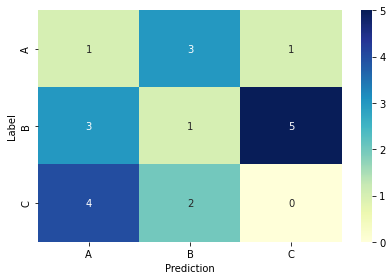

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

N= 20; n_class = 3; class_names = ['A','B','C']
label = np.random.randint(0,n_class, size=N)
pred = np.random.randint(0,n_class, size=N)
print('label: ', label)
print('pred: ',pred)
# 1. sklearn confusion matrix
confusion_matrix = confusion_matrix(label, pred)

# 2. manual calculation
confusion_matrix2 = np.empty((n_class,n_class), int)
for i in range(n_class):
    confusion_matrix2[i] = np.bincount(pred[np.where(label==i)],minlength=n_class)


# 3. tensorflow confusion matrix
confusion_matrix3 = tf.math.confusion_matrix(label, pred) 

# visualization
sns.heatmap(confusion_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g',cmap="YlGnBu")  # cmap="Blues"
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.tight_layout()
plt.show()


#cifar10 data 분류

https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)  # torchvision.datasets.cifar.CIFAR10
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


50000 10000
torch.Size([3, 32, 32]) 7


Text(0.5, 1.0, 'horse')

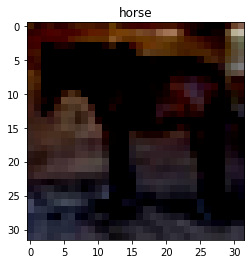

In [39]:
print(len(trainset), len(testset))

i = np.random.randint(0,50000)
x,y = trainset[i]
print(x.shape, y)
#plt.figure(figsize=(1,1))
xx = x.numpy()
xx = xx/2 + 0.5
plt.imshow(x.numpy().transpose(1,2,0))
plt.title(classes[y])

In [4]:
it = iter(trainloader)
x,y=it.next()
print(x.shape, y.shape)

torch.Size([4, 3, 32, 32]) torch.Size([4])


Text(0.5, 1.0, "['horse', 'dog', 'dog', 'truck']")

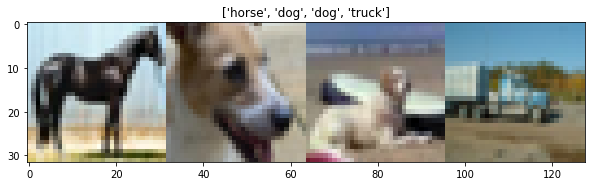

In [5]:
image_concat = torch.cat([*x.permute(0,2,3,1)],1).numpy()
image_concat = image_concat/2+0.5
plt.figure(figsize=(10,10))
plt.imshow(image_concat)
plt.title([classes[i] for i in y])

truck plane  bird   cat


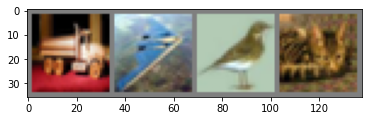

In [15]:
# torchvision.utils.make_grid 활용하기: 5, 3, 224, 224  ---> out: 3, 228, 1132

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


device: cuda:0


In [14]:
s_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f elapsed: %.2f' % (epoch + 1, i + 1, running_loss / 2000,time.time()-s_time))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.188 elapsed: 9.67
[1,  4000] loss: 1.210 elapsed: 18.58
[1,  6000] loss: 1.204 elapsed: 28.30
[1,  8000] loss: 1.182 elapsed: 37.66
[1, 10000] loss: 1.204 elapsed: 46.53
[1, 12000] loss: 1.172 elapsed: 55.96
[2,  2000] loss: 1.098 elapsed: 67.32
[2,  4000] loss: 1.108 elapsed: 76.51
[2,  6000] loss: 1.094 elapsed: 86.00
[2,  8000] loss: 1.100 elapsed: 95.34
[2, 10000] loss: 1.099 elapsed: 104.90
[2, 12000] loss: 1.085 elapsed: 114.16
Finished Training


# Test해 보기

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car  ship plane


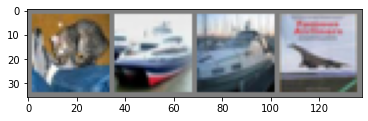

In [19]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images.to(device))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [27]:
# test accuracy
correct = 0
total = 0
labels_all = []
predicted_all = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

        labels_all.extend(labels.numpy())
        predicted_all.extend(predicted.cpu().numpy())

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(labels_all, predicted_all)  # numpy array


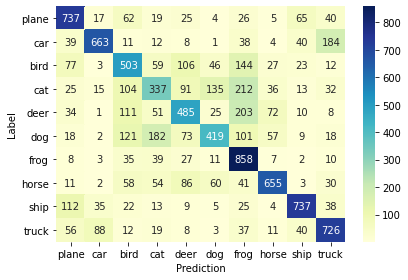

In [38]:
sns.heatmap(confusion_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt='g',cmap="YlGnBu")  # cmap="Blues"
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.tight_layout()
plt.show()